In [38]:
#Q2
#Step 1: Prepare Dataset
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

print("Missing values in each column:")
print(df.isnull().sum())
data_cleaned = df.drop(columns=['CustomerID', 'Gender'])
df_cleaned = data_cleaned.drop_duplicates()

print ('Clean data: ')
print (df_cleaned)

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Clean data: 
     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


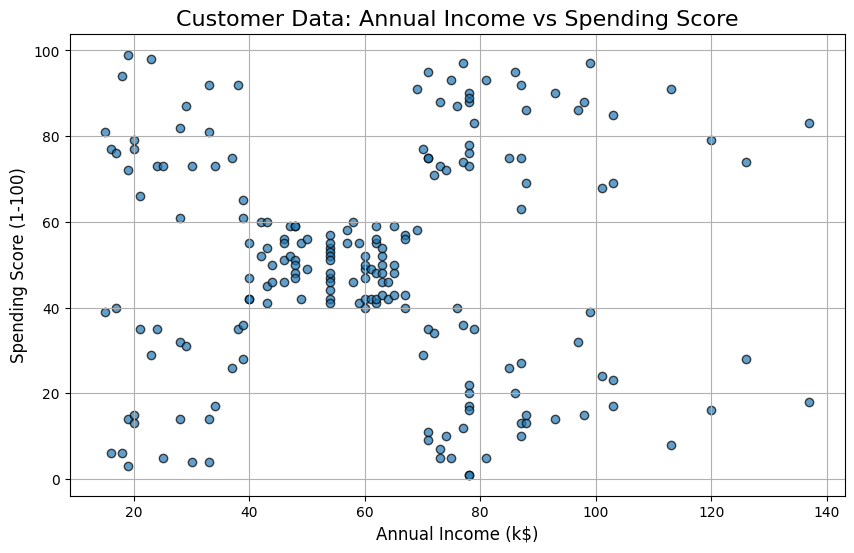

In [39]:
#Step2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.7, edgecolor='k')
plt.title('Customer Data: Annual Income vs Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()


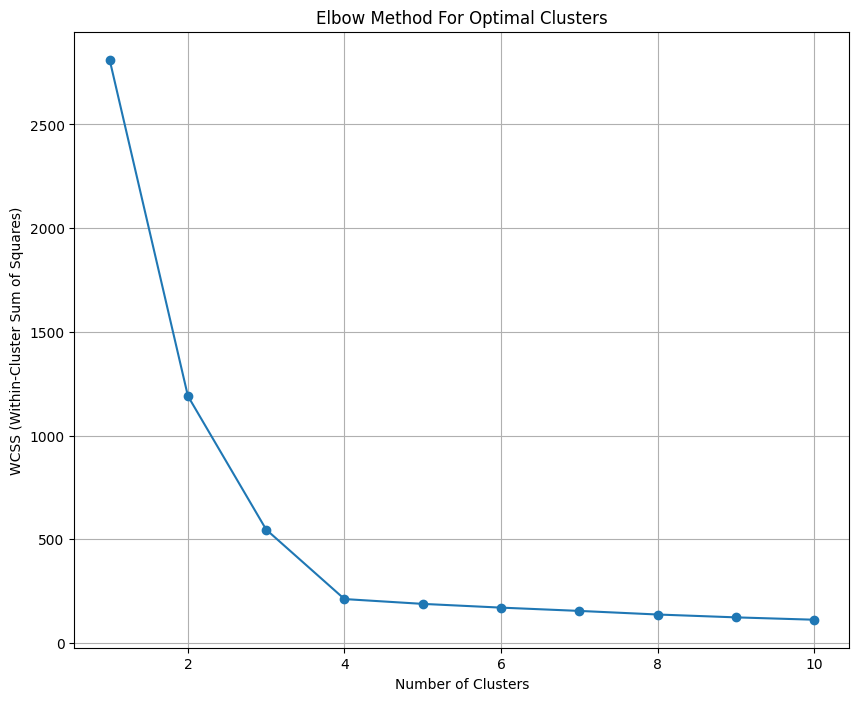

[1 0 3 4 1 1 2 3 4 4 2 0 3 0 1 3 3 1 2 2 1 1 3 2 2 3 1 3 2 3 4 0 3 0 0 0 0
 0 2 1 3 2 3 3 2 2 4 2 0 1 2 1 4 1 1 2 4 2 0 1 0 3 4 2 2 2 0 1 0 2 3 2 4 2
 2 4 2 3 1 4 1 3 1 1 4 3 1 3 0 0 3 1 4 2 2 3 1 1 3 2 4 1 4 1 3 1 1 3 0 3 2
 2 1 0 1 3 0 1 1 3 2 1 2 1 1 1 1 2 1 2 4 2 2 1 0 2 2 0 3 4 0 2 3 2 3 2 0 3
 0 0 0 3 0 3 1 2 4 2 1 3 0 3 3 1 3 2 2 3 1 3 3 4 1 3 2 4 1 1 3 2 1 3 2 2 3
 3 3 3 1 0 3 2 3 3 2 2 2 3 2 0 3 2 1 2 3 0 2 4 3 0 3 2 3 3 0 2 2 1 1 3 0 1
 1 2 1 2 3 4 4 3 3 4 3 1 2 3 1 2 4 2 1 3 1 0 0 0 0 2 2 0 3 2 1 3 2 2 2 1 1
 0 3 3 2 1 4 2 3 4 3 1 1 2 2 3 1 1 1 3 4 0 1 1 3 1 1 1 0 2 4 3 1 1 0 4 4 1
 1 3 4 2]


In [40]:
#step3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

wcss = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)



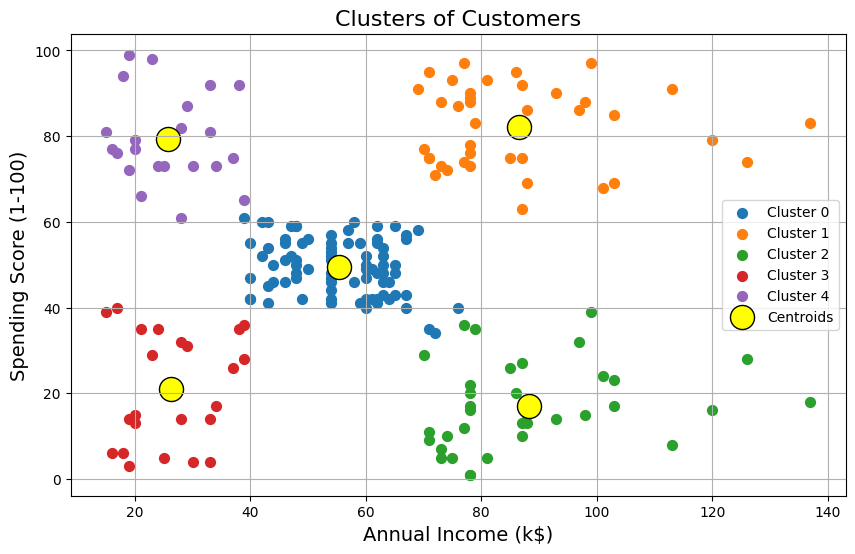

In [50]:
#step4
# Visualizing the clusters
import matplotlib.pyplot as plt
X= df[['Annual Income (k$)','Spending Score (1-100)']].values

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data_x = X[y_kmeans==cluster, 0]  # Get X values for the cluster
    cluster_data_y = X[y_kmeans==cluster, 1]  # Get Y values for the cluster

    plt.scatter(cluster_data_x, cluster_data_y, label=f'Cluster {cluster}', s=50)

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolor='k')
plt.title('Clusters of Customers', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Summary of each cluster
cluster_summary = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster_summary['Cluster'] = y_kmeans

# Display cluster sizes
cluster_sizes = cluster_summary['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Display summary statistics for each cluster
cluster_stats = cluster_summary.groupby('Cluster').mean()
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Sizes:
Cluster
0    81
1    39
2    35
3    23
4    22
Name: count, dtype: int64

Cluster Statistics:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 88.200000               17.114286
3                 26.304348               20.913043
4                 25.727273               79.363636
